IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [1]:
import kaggle as kg
kg.api.authenticate()

kg.api.dataset_download_files(dataset = "mshepherd/board-games", path='on.zip', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/mshepherd/board-games


### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [3]:
# Data import

paths = [Path("on.zip/bgg_GameItem.csv"),
         Path("on.zip/bgg_Category.csv"), Path("on.zip/bgg_GameFamily.csv"), Path("on.zip/bgg_GameType.csv"),
         Path("on.zip/bgg_Mechanic.csv"), Path("on.zip/bgg_Person.csv"), Path("on.zip/bgg_Publisher.csv")]

# General
raw_main_data = pd.read_csv(paths[0]).fillna(np.nan)

# Category
category_data = pd.read_csv(paths[1])
category_data.columns = ["category_id", "category_name"]
category_data["category_id"] = category_data["category_id"].astype(str)

# Family
family_data = pd.read_csv(paths[2])
family_data.columns = ["family_id", "family_name"]
family_data["family_id"] = family_data["family_id"].astype(str)

# GameType
gametype_data = pd.read_csv(paths[3])
gametype_data.columns = ["gametype_id", "gametype_name"]
gametype_data["gametype_id"] = gametype_data["gametype_id"].astype(str)

# Mechanic
mechanic_data = pd.read_csv(paths[4])
mechanic_data.columns = ["mechanic_id", "mechanic_name"]
mechanic_data["mechanic_id"] = mechanic_data["mechanic_id"].astype(str)

# Person
person_data = pd.read_csv(paths[5])
person_data.columns = ["person_id", "person_name"]
person_data["person_id"] = person_data["person_id"].astype(str)

# Publisher
publisher_data = pd.read_csv(paths[6])
publisher_data.columns = ["publisher_id", "publisher_name"]
publisher_data["publisher_id"] = publisher_data["publisher_id"].astype(str)

In [4]:
print(raw_main_data[raw_main_data["designer"].isnull() == True][["bgg_id", "name", "designer", "artist"]].head(2))

      bgg_id                 name designer artist
1629    1920    The Business Game      NaN    NaN
1664    1958  The Game of Nations      NaN    NaN


In [5]:
# map IDs to names, categorys, etc
dict_map_id_to_category = dict(zip(category_data["category_id"], category_data["category_name"]))
dict_map_id_to_family = dict(zip(family_data["family_id"], family_data["family_name"]))
dict_map_id_to_gametype = dict(zip(gametype_data["gametype_id"], gametype_data["gametype_name"]))
dict_map_id_to_mechanic = dict(zip(mechanic_data["mechanic_id"], mechanic_data["mechanic_name"]))
dict_map_id_to_name = dict(zip(person_data["person_id"], person_data["person_name"]))
dict_map_id_to_publisher = dict(zip(publisher_data["publisher_id"], publisher_data["publisher_name"]))

def map_one_to_many(cell, dict_map):
    if pd.isnull(cell):
        return np.nan
    splited_cell = cell.split(",")
    for i, value in enumerate(splited_cell):
        splited_cell[i] = dict_map.get(value.strip(), "ID NOT FOUND")
    return ",".join(splited_cell)

In [6]:
raw_main_data["category"] = raw_main_data["category"].apply(lambda x: map_one_to_many(x, dict_map_id_to_category))
raw_main_data["family"] = raw_main_data["family"].apply(lambda x: map_one_to_many(x, dict_map_id_to_family))
raw_main_data["game_type"] = raw_main_data["game_type"].apply(lambda x: map_one_to_many(x, dict_map_id_to_gametype))
raw_main_data["mechanic"] = raw_main_data["mechanic"].apply(lambda x: map_one_to_many(x, dict_map_id_to_mechanic))
raw_main_data["designer"] = raw_main_data["designer"].apply(lambda x: map_one_to_many(x, dict_map_id_to_name))
raw_main_data["artist"] = raw_main_data["artist"].apply(lambda x: map_one_to_many(x, dict_map_id_to_name))
raw_main_data["publisher"] = raw_main_data["publisher"].apply(lambda x: map_one_to_many(x, dict_map_id_to_publisher))

**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



In [7]:
files_size = 0
for path in paths:
    files_size += os.path.getsize(path)
memory_usage = raw_main_data.memory_usage().sum()
print(f"Dataframe size: {memory_usage} bytes \nCSV files size: {files_size} bytes")

Dataframe size: 34626948 bytes 
CSV files size: 18010306 bytes


#### **3.1 b) RESPUESTA**
El **Dataframe usa en memoria 34626948 bytes**, ≈ 34.62 GB, mientras que los **archivos csv usan en disco 17841491 bytes**, ≈ 17.84 MB, esto se debe a que la clase pd.DataFrame tambien tiene atributos y metodos que debe alojar en memoria, a diferencia de los archivos csv que son solo información en texto plana

### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?

In [8]:
main_data_valid_year = raw_main_data[raw_main_data["year"].notnull() == True]# .sort_values(by="year", ascending=True)

In [9]:
print(main_data_valid_year.year.unique()[:30])

[1986. 1981. 1998. 1992. 1964. 1989. 1978. 1993. 1997. 1999. 1995. 1977.
 1996. 1994. 1991. 1988. 1979. 1984. 1987. 1975. 1982. 1980. 1990. 1800.
 1974. 1972. 1983. 1903. 1959. 1985.]


Vemos que hay años muy bajos, lo que es raro, pero siguen siendo numeros enteros, así que son válidos.

In [10]:
main_data_1500_lower_years = main_data_valid_year[main_data_valid_year["year"] <= 1500].sort_values(by="year", ascending=True)
print(main_data_1500_lower_years[["name", "year"]].head(5))

               name    year
2060          Senet -3500.0
3593          Mehen -3000.0
10284  Knucklebones -3000.0
4815        Marbles -3000.0
20170    20 Squares -3000.0


#### **3.2 a) RESPUESTA**
Los años podrian tener sentido, siguen siendo numeros enteros, pero es improbable que realmente se haya creado un juego de mesa en el año -3500, revisando bien los nombres, veremos juegos como el ajedrez (chess), las canicas (marbles), Go y más, por lo que los años SÍ tienen sentido.

**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

In [11]:
main_data_1980_2025 = main_data_valid_year[main_data_valid_year["year"] <= 2025]
main_data_1980_2025 = main_data_1980_2025[main_data_1980_2025["year"] >= 1980]

In [12]:
series_1980_2025_years = main_data_1980_2025["year"]
quantity = series_1980_2025_years.value_counts().sort_index(ascending=True)

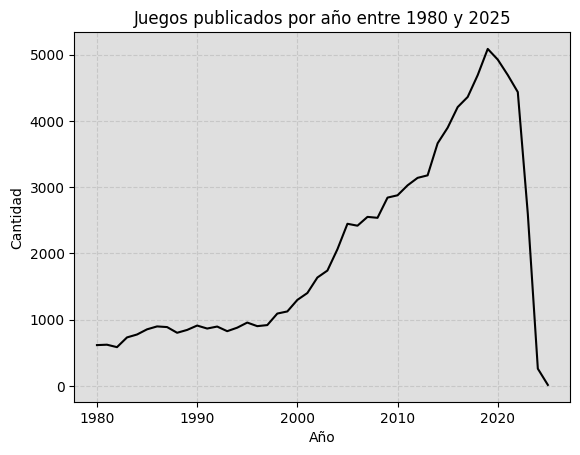

In [13]:
plot_x_axis = quantity.index
plot_y_axis = quantity.values

fig, ax = plt.subplots()

ax.set_title("Juegos publicados por año entre 1980 y 2025")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad")

# ax.axhline(y=1000, color="black", linestyle="--", linewidth=1)
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.grid(True, axis="x", linestyle="--", alpha=0.5)

ax.set_facecolor("#dfdfdf")

ax.plot(plot_x_axis, plot_y_axis, color="black", alpha=1 )
# ax.bar(plot_x_axis, plot_y_axis, color="#0080ff", alpha=0.1)
plt.show()

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

In [14]:
df_publicaciones_1980_2025 = pd.DataFrame(quantity).reset_index()
df_publicaciones_1980_2025["pct_change"] = df_publicaciones_1980_2025["count"].pct_change()/df_publicaciones_1980_2025["year"].diff()*100
df_publicaciones_1980_2025["diff"] = df_publicaciones_1980_2025["count"].diff()/df_publicaciones_1980_2025["year"].diff()

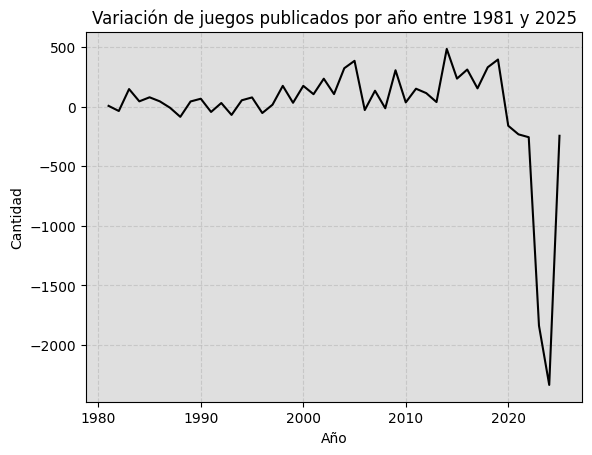

      year   diff
34  2014.0  484.0
39  2019.0  395.0
25  2005.0  384.0


In [15]:
fig, ax = plt.subplots()

ax.set_title("Variación de juegos publicados por año entre 1981 y 2025")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad")

ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.grid(True, axis="x", linestyle="--", alpha=0.5)

ax.set_facecolor("#dfdfdf")

ax.plot(df_publicaciones_1980_2025["year"], df_publicaciones_1980_2025["diff"], color="black", alpha=1 )
plt.show()
print(df_publicaciones_1980_2025[["year", "diff"]].sort_values(by="diff", ascending=False).head(3))

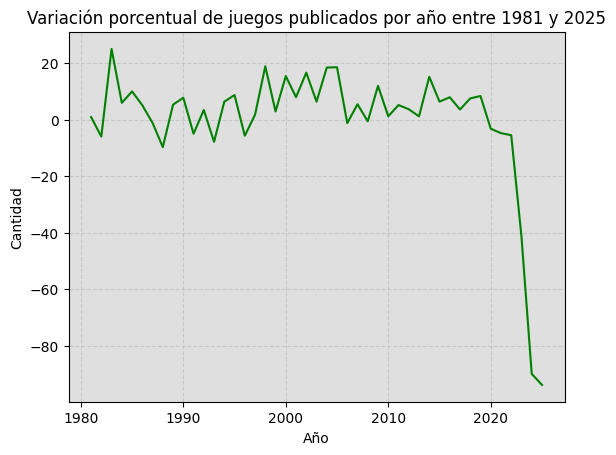

      year  pct_change
3   1983.0   25.085324
18  1998.0   18.933624
25  2005.0   18.604651


In [16]:
fig, ax = plt.subplots()

ax.set_title("Variación porcentual de juegos publicados por año entre 1981 y 2025")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad")

ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.grid(True, axis="x", linestyle="--", alpha=0.5)

ax.set_facecolor("#dfdfdf")

ax.plot(df_publicaciones_1980_2025["year"], df_publicaciones_1980_2025["pct_change"], color="green", alpha=1)
plt.show()
print(df_publicaciones_1980_2025[["year", "pct_change"]].sort_values(by="pct_change", ascending=False).head(3))

#### **3.2 c) RESPUESTA**

(editar casilla para visualización correcta)

Los 3 años con mayores publicaciones fueron:
año :    juegos publicados
2019:    5087
2020:    4926
2021:    4693

Los 3 años con mayor creciemiento cuantitativo en publicaciones fueron
año :    diferencia con respecto al año anterior con datos no nulos
2014:    484
2019:    395
2005:    384

Los 3 años con mayor crecimiento porcentual en publicaciones fueron
año :   cambio porcentual con respecto al año anterior con datos no nulos
1983:   25.085324%
1998:   18.933624%
2005:   18.604651%

### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

In [17]:
# main_data_1980_2025

main_data_valid_time = main_data_1980_2025[main_data_1980_2025["min_time"].notnull() == True].copy()
main_data_valid_time = main_data_valid_time[main_data_valid_time["max_time"].notnull() == True]

main_data_valid_complexity = main_data_1980_2025[main_data_1980_2025["complexity"].notnull() == True].copy()

main_data_valid_time_complexity = main_data_valid_time[main_data_valid_time["complexity"].notnull() == True].copy()




main_data_valid_time = main_data_valid_time_complexity.copy()
"""
Lo siento por el nombre confuso de variables de esta casilla, pero no sabía si aquí había que hacer filtrar
en un solo df por ambas condiciones o como era, asi como no sabia si tenia que seguir con el mismo ya filtrado por años
limpiado por categoria o como, y sin un IDE adecuado no quiero cambiar todos los nombres de variable,
pero es confusa solo esta casilla jaja
"""

'\nLo siento por el nombre confuso de variables de esta casilla, pero no sabía si aquí había que hacer filtrar\nen un solo df por ambas condiciones o como era, asi como no sabia si tenia que seguir con el mismo ya filtrado por años\nlimpiado por categoria o como, y sin un IDE adecuado no quiero cambiar todos los nombres de variable,\npero es confusa solo esta casilla jaja\n'

In [18]:
# Eliminar juegos en los que min_time > max_time, ya que no tiene sentido

no_elim = main_data_valid_time.shape[0]
main_data_valid_time = main_data_valid_time[main_data_valid_time["min_time"] <= main_data_valid_time["max_time"]]
elim = main_data_valid_time.shape[0]

print(f"Juegos en los que 'min_time' > 'max_time' eliminados\nFilas pre-eliminación: {no_elim}\nFilas pos-eliminación: {elim}\nFilas eliminadas: {no_elim - elim}, {(100/no_elim) * (no_elim - elim)}%")

Juegos en los que 'min_time' > 'max_time' eliminados
Filas pre-eliminación: 39544
Filas pos-eliminación: 39525
Filas eliminadas: 19, 0.04804774428484726%


In [19]:
main_data_valid_time[["name", "year", "category", "min_time", "max_time"]].sort_values(by="max_time", ascending=False).head(5)

# Usaré la regla del rango intercualtílico para determinar datos anómalos con un error de 5 veces el IQR (Q3-Q1)

quantiles_max_time = main_data_valid_time["max_time"].quantile([0, 0.25, 0.5, 0.75, 1])

no_elim = main_data_valid_time.shape[0]
main_data_valid_time = main_data_valid_time[main_data_valid_time["max_time"] <= quantiles_max_time[0.75] + (5 * (quantiles_max_time[0.75] - quantiles_max_time[0.25]))]
elim = main_data_valid_time.shape[0]
main_data_valid_time[["name", "year", "category", "min_time", "max_time"]].sort_values(by="max_time", ascending=False)

print(f"Juegos con 'max_time' anómalo\nFilas pre-eliminacion: {no_elim}\nFilas pos-eliminación: {elim}\nFilas eliminadas: {no_elim - elim}, {(100/no_elim) * (no_elim - elim)}%")

# Ya que min_time <= max_time, y max_time ya está acotado superiormente, no es necesario acotar min_time

Juegos con 'max_time' anómalo
Filas pre-eliminacion: 39525
Filas pos-eliminación: 38983
Filas eliminadas: 542, 1.3712839974699558%


**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

In [20]:
main_data_valid_time["avg_time"] = (main_data_valid_time["min_time"] + main_data_valid_time["max_time"]) / 2

**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

In [21]:
main_data_valid_time_1980_1925 = main_data_valid_time[main_data_valid_time["year"] <= 2025]
main_data_valid_time_1980_1925 = main_data_valid_time_1980_1925[main_data_valid_time_1980_1925["year"] >= 1980]

avg_time_by_year = main_data_valid_time_1980_1925[["year", "avg_time"]].groupby(by=["year"]).mean()

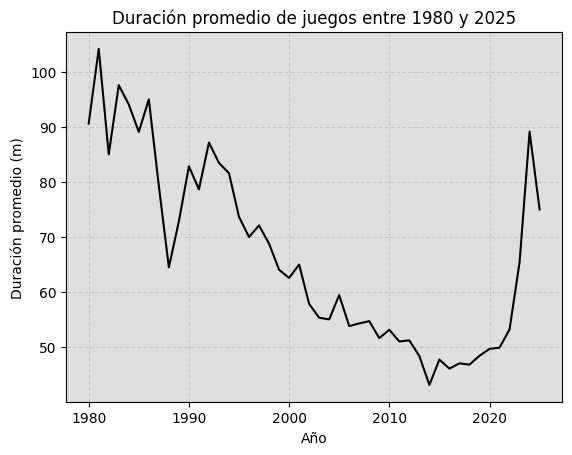

In [22]:
fig, ax = plt.subplots()

ax.set_title("Duración promedio de juegos entre 1980 y 2025")
ax.set_xlabel("Año")
ax.set_ylabel("Duración promedio (m)")

ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.grid(True, axis="x", linestyle="--", alpha=0.5)

ax.set_facecolor("#dfdfdf")

ax.plot(avg_time_by_year.index, avg_time_by_year["avg_time"], color="black", alpha=1)
plt.show()

#### **3.3 c) RESPUESTA**
Entre 1980 y 2014 aprox, se puede ver una clara tendencia en la disminución del tiempo promedio de los juegos, luego desde 2015 aprox. en adelante se ve una tendencia por aumentar la duración, hasta el 2025 que se ve que baja, pero puede ser un año anómalo así como también un cambio en la tendencia.

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

In [23]:
# se consideró actualidad como 2025

main_data_valid_time_complexity = main_data_valid_time_complexity[main_data_valid_time_complexity["num_votes"] >= 100]
complexity_by_year = main_data_valid_time_complexity[["year", "complexity"]].groupby(by="year").mean()

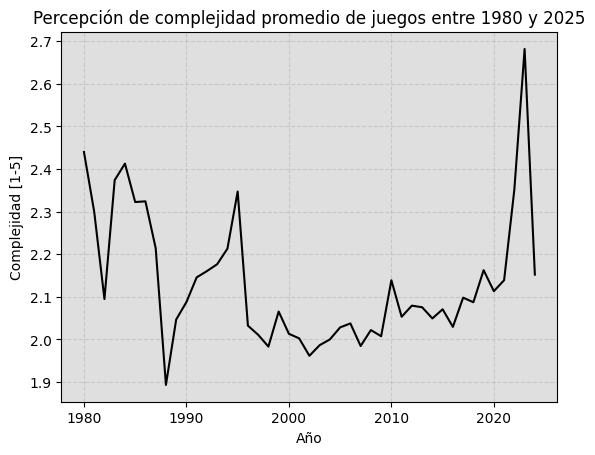

In [24]:
fig, ax = plt.subplots()

ax.set_title("Percepción de complejidad promedio de juegos entre 1980 y 2025")
ax.set_xlabel("Año")
ax.set_ylabel("Complejidad [1-5]")

ax.grid(True, axis="y", linestyle="--", alpha=0.5)
ax.grid(True, axis="x", linestyle="--", alpha=0.5)

ax.set_facecolor("#dfdfdf")

ax.plot(complexity_by_year.index, complexity_by_year["complexity"], color="black", alpha=1)
plt.show()

#### **3.3 d) RESPUESTA**
*El gráfico no contiene 2025 porque no hay datos del 2025 con los filtros aplicados.*

Entre 1980 y 1996 la percepción fluctuó bastante, pero desde 1997 hasta el 2021 hubo un tendencia al aumento de la percepción de la complejidad.Entre 2021 y 2023 Se disparó la percepción y luego bajó nuevamente en 2024. La percepción ha cambiado bastante con los años, manteniendose entre 1.8 y 2.7 puntos de referencia en una escala del 1 al 5.

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

In [25]:
data_1980_2025_year_category = main_data_1980_2025[["year", "category"]].copy()
data_1980_2025_year_category["category_list"] = data_1980_2025_year_category["category"].str.split(',')
data_1980_2025_year_category = data_1980_2025_year_category.explode("category_list")
data_1980_2025_year_category["1s_lol"] = 1
groupby_category = data_1980_2025_year_category[["category_list", "1s_lol"]].groupby(by="category_list").sum().sort_values(by="1s_lol", ascending=False)

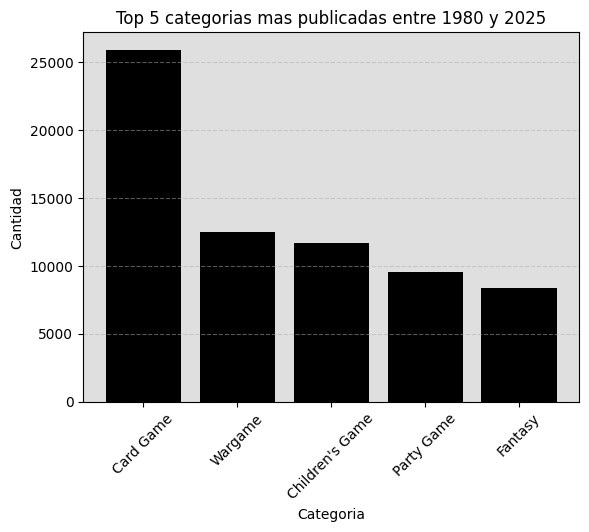

In [26]:
fig, ax = plt.subplots()

ax.set_title("Top 5 categorias mas publicadas entre 1980 y 2025")
ax.set_xlabel("Categoria")
ax.set_ylabel("Cantidad")

ax.grid(True, axis="y", linestyle="--", alpha=0.5)
# ax.grid(True, axis="x", linestyle="--", alpha=0.5)

ax.set_facecolor("#dfdfdf")

ax.bar(groupby_category[:5].index, groupby_category["1s_lol"][:5], color="black", alpha=1)
plt.xticks(rotation=45)
plt.show()

**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

In [27]:
# Que innecesario crear 5 df, basta con
groupby_category_year = data_1980_2025_year_category[["year", "category_list", "1s_lol"]].groupby(by=["category_list", "year"]).sum()
groupby_category_year = groupby_category_year[groupby_category_year.index.get_level_values(0).isin(groupby_category[:5].index)]

**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


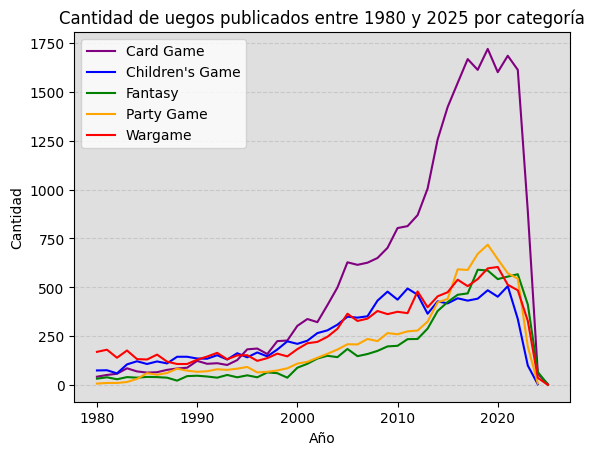

In [28]:
fig, ax = plt.subplots()

ax.set_title("Cantidad de uegos publicados entre 1980 y 2025 por categoría")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad")

ax.grid(True, axis="y", linestyle="--", alpha=0.5)

ax.set_facecolor("#dfdfdf")

for index_level_0, color in zip(groupby_category_year.index.get_level_values(0).unique(), ["purple", "blue", "green", "orange", "red"]):
    ax.plot(groupby_category_year.loc[index_level_0].index,
        groupby_category_year.loc[index_level_0]["1s_lol"],
        color=color, alpha=1, label=index_level_0)

ax.legend()
plt.show()

### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?

In [29]:
# Considerando UNICAMENTE los archivos que empiezan con 'bgg'
print("Problemas lógicos:")
print(f"   Hay {raw_main_data[raw_main_data["year"] > 2025].shape[0]} juegos publicados luego del 2025")
print("      Aunque podrian ser adelantos?")
print(f"   Hay {raw_main_data[raw_main_data["min_time"] > raw_main_data["max_time"]].shape[0]} filas en las que el tiempo minimo de juego es mayor al tiempo maximo de juego")
print(f"   Hay {raw_main_data[raw_main_data["min_players"] > raw_main_data["max_players"]].shape[0]} filas en las los jugadores minimos son mayores a los jugadores maximos")
print("Leve limitación:")
print("   La base de datos (descargada) no contiene información de que es cada columna")

Problemas lógicos:
   Hay 2 juegos publicados luego del 2025
      Aunque podrian ser adelantos?
   Hay 61 filas en las que el tiempo minimo de juego es mayor al tiempo maximo de juego
   Hay 12 filas en las los jugadores minimos son mayores a los jugadores maximos
Leve limitación:
   La base de datos (descargada) no contiene información de que es cada columna
